<a href="https://colab.research.google.com/github/GoryachevDaniil/PySpark_Intro/blob/main/PySpark_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import platform

# if platform == "linux" or platform == "linux2":
#     # linux
# elif platform == "darwin":
#     # OS X
# elif platform == "win32":
#     # Windows...


# platform.system()

In [2]:
!pip install pyspark==3.0.1 py4j==0.10.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
DATA_DIR = '/content/gdrive/My Drive/InnoStage_Intership/data/'

In [6]:
# pyspark --packages org.apache.spark:spark-avro_2.12:3.3.0 --py-files my_pyFile.py # use on pc

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('My_1st_PySpark')\
        .getOrCreate()

# spark.stop()

In [8]:
# CSV 
# Источник данныx: https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

In [9]:
from pyspark.sql.types import StructType, StringType, IntegerType, BooleanType, StructField

fromCsv = spark.read.csv(DATA_DIR + 'iris.csv', sep=',', header=True) # v1
fromCsv.printSchema()

newSchema = StructType().add("col1", IntegerType(), True)\
                        .add("col2", StringType(), True)\
                        .add("col3", BooleanType(), False)

csvNewSchema = spark.read.csv(DATA_DIR + 'iris.csv', header=True, schema=newSchema)
csvNewSchema.printSchema()

try:
  fromCsv.write.csv(DATA_DIR + 'test_csv_file.csv', header="true")
except:
  fromCsv.write.csv(DATA_DIR + 'test_csv_file.csv', header='True', mode="overwrite")
finally:
  fromCsv = spark.read.options(header=True).csv(DATA_DIR + 'test_csv_file.csv')
fromCsv.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- sepal length: string (nullable = true)
 |-- sepal width: string (nullable = true)
 |-- petal length: string (nullable = true)
 |-- petal width: string (nullable = true)
 |-- species: string (nullable = true)

root
 |-- col1: integer (nullable = true)
 |-- col2: string (nullable = true)
 |-- col3: boolean (nullable = true)

root
 |-- _c0: string (nullable = true)
 |-- sepal length: string (nullable = true)
 |-- sepal width: string (nullable = true)
 |-- petal length: string (nullable = true)
 |-- petal width: string (nullable = true)
 |-- species: string (nullable = true)



In [10]:
# Parquet
# Источник данныx:https://sparkbyexamples.com/pyspark/pyspark-read-and-write-parquet-file/

In [11]:
data =[("James ","","Smith","36636","M",3000),
        ("Michael ","Rose","","40288","M",4000),
        ("Robert ","","Williams","42114","M",4000),
        ("Maria ","Anne","Jones","39192","F",4000),
        ("Jen","Mary","Brown","","F",-1)]
columns=["firstname","middlename","lastname","dob","gender","salary"]
df=spark.createDataFrame(data,columns)
df.show()

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
+---------+----------+--------+-----+------+------+



In [12]:
try:
  df.write.parquet(DATA_DIR + 'test_parquet_file.parquet')
except Exception as ex:
  print(ex)
fromParquet = spark.read.parquet(DATA_DIR + 'test_parquet_file.parquet')
fromParquet.show()

path file:/content/gdrive/My Drive/InnoStage_Intership/data/test_parquet_file.parquet already exists.;
+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
+---------+----------+--------+-----+------+------+



In [13]:
fromParquet.createOrReplaceTempView("fromParquetTable")
fromParquet.printSchema()
fromParquet.show()

root
 |-- firstname: string (nullable = true)
 |-- middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
+---------+----------+--------+-----+------+------+



In [14]:
fromParquetSQL = spark.sql("select * from fromParquetTable where gender == 'M'")
fromParquetSQL.show()

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|  Robert |          |Williams|42114|     M|  4000|
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
+---------+----------+--------+-----+------+------+



In [15]:
try:
  fromParquet.write.partitionBy('gender').parquet(DATA_DIR + 'test_partition_parquet_file.parquet')
except Exception as ex:
  print(ex)
fromPartitionParquet = spark.read.parquet(DATA_DIR.lstrip('/content/') + 'test_partition_parquet_file.parquet/gender=M')
fromPartitionParquet.show()

path file:/content/gdrive/My Drive/InnoStage_Intership/data/test_partition_parquet_file.parquet already exists.;
+---------+----------+--------+-----+------+
|firstname|middlename|lastname|  dob|salary|
+---------+----------+--------+-----+------+
|  Robert |          |Williams|42114|  4000|
|   James |          |   Smith|36636|  3000|
| Michael |      Rose|        |40288|  4000|
+---------+----------+--------+-----+------+



In [16]:
try:
  spark.sql("CREATE TEMPORARY VIEW PERSONS USING parquet OPTIONS \
            (path \"/content/gdrive/My Drive/InnoStage_Intership/data/test_partition_parquet_file.parquet\/gender=F\")")
except Exception as ex:
  print(ex)
spark.sql("SELECT * FROM PERSONS" ).show()

+---------+----------+--------+-----+------+
|firstname|middlename|lastname|  dob|salary|
+---------+----------+--------+-----+------+
|   Maria |      Anne|   Jones|39192|  4000|
|      Jen|      Mary|   Brown|     |    -1|
+---------+----------+--------+-----+------+



In [17]:
# Avro
# Источник данныx:https://sparkbyexamples.com/pyspark/pyspark-read-and-write-parquet-file/

In [18]:
# !pip install avro

In [19]:
# import avro

In [20]:
# fromAvro = spark.read.format("avro").load("data/users.avro") # local session on pc
# subset = df.where("favorite_color == 'red'")
# try:
#   subset.write.format("avro").save("data/output_avro")
# except Exception as ex:
#   print(ex)
#   subset.write.mode("overwrite").format("avro").save("data/output_avro")

In [21]:
# Task 2

In [22]:
# from pyspark.sql import SparkSession

# spark = SparkSession.builder\
#         .master("local[*]")\
#         .appName('My_2nd_PySpark')\
#         .getOrCreate()

In [23]:
!pip install dpkt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import os
import os.path
import dpkt
import socket
import pandas as pd
import numpy as np

In [25]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyspark.sql.functions as F

In [26]:
def main():
    pcap = dpkt.pcap.Reader(open('/content/gdrive/My Drive/InnoStage_Intership/data/wireshark_test.pcap', "rb"))
    data = []
    for ts, buf in pcap:
        eth = dpkt.ethernet.Ethernet(buf)
        ip = eth.data
        try:
            ipsrc = socket.inet_ntoa(ip.src)
            ipdst = socket.inet_ntoa(ip.dst)
            srcport = ip.data.sport
            dstport = ip.data.dport
        except:
            continue
        data.append([ipsrc, ipdst, srcport, dstport, len(buf)])
    columns = ['Source', 'Destination', 'Source_Port', 'Destination_Port', 'Bytes']
    df = pd.DataFrame(data, columns=columns)
    table = pa.Table.from_pandas(df)

    if os.path.exists('/content/gdrive/My Drive/InnoStage_Intership/data/ParsedPcap.parquet'):
        os.remove('/content/gdrive/My Drive/InnoStage_Intership/data/ParsedPcap.parquet')
    pq.write_table(table, '/content/gdrive/My Drive/InnoStage_Intership/data/ParsedPcap.parquet')

if __name__ == "__main__":
    main()

In [27]:
pcapFile = spark.read.parquet(DATA_DIR + 'ParsedPcap.parquet')
# pcapFile = spark.read.parquet('data/ParsedPcap.parquet')

In [28]:
pcapFile.show()

+--------------+--------------+-----------+----------------+-----+
|        Source|   Destination|Source_Port|Destination_Port|Bytes|
+--------------+--------------+-----------+----------------+-----+
|192.168.10.148|192.168.11.255|       7890|            7890|   82|
| 192.168.10.59|192.168.11.255|       7890|            7890|   85|
|192.168.10.122|192.168.11.255|       7890|            7890|   82|
| 192.168.10.35|   224.0.0.251|       5353|            5353|  119|
|   69.94.76.71| 192.168.10.84|        443|           52510|  328|
| 192.168.10.84|   69.94.76.71|      52510|             443|   54|
| 192.168.10.84|   69.94.76.71|      52510|             443|  774|
| 192.168.10.59|192.168.11.255|       7890|            7890|   96|
|192.168.10.208|192.168.11.255|       7890|            7890|   89|
|   69.94.76.71| 192.168.10.84|        443|           52510| 1434|
|   69.94.76.71| 192.168.10.84|        443|           52510|  382|
| 192.168.10.84|   69.94.76.71|      52510|             443|  

In [29]:
df_1 = pcapFile.groupBy('Source').count()
df_1.show()

+--------------+-----+
|        Source|count|
+--------------+-----+
| 192.168.10.97|   40|
| 192.168.10.79|    4|
|192.168.10.175|   23|
| 192.168.10.54|   40|
|   69.94.76.71|    3|
|209.85.233.139|    2|
|192.168.10.145|    4|
| 192.168.10.58|    1|
| 192.168.10.53|   40|
| 192.168.10.84|   30|
| 192.168.10.15|    1|
|108.177.14.188|    1|
|192.168.10.122|   41|
| 192.168.10.25|   22|
|74.125.205.105|    4|
| 192.168.10.39|   23|
|  192.168.10.1|    2|
|192.168.10.192|    5|
| 192.168.10.24|    2|
|192.168.10.209|    2|
+--------------+-----+
only showing top 20 rows



In [30]:
df_2 = pcapFile.groupBy('Source', 'Destination').count()
df_2.show()

+--------------+---------------+-----+
|        Source|    Destination|count|
+--------------+---------------+-----+
|192.168.10.134| 192.168.11.255|   22|
|192.168.10.209| 192.168.11.255|    1|
| 192.168.10.53| 192.168.11.255|   40|
| 192.168.10.84|   192.168.10.1|    2|
|192.168.10.148| 192.168.11.255|   23|
| 192.168.10.84|    69.94.76.71|    3|
|192.168.10.115| 192.168.11.255|   40|
|108.177.14.188|  192.168.10.84|    1|
|192.168.10.145|239.255.255.250|    4|
|209.85.233.139|  192.168.10.84|    2|
| 192.168.10.35|    224.0.0.251|    3|
|192.168.10.175| 192.168.11.255|   23|
|192.168.10.209|    224.0.0.251|    1|
| 192.168.10.59| 192.168.11.255|   42|
| 192.168.10.58|    224.0.0.251|    1|
|74.125.205.105|  192.168.10.84|    4|
| 192.168.10.97| 192.168.11.255|   40|
|192.168.10.122| 192.168.11.255|   41|
|192.168.10.202|239.255.255.250|    9|
| 192.168.10.39| 192.168.11.255|   23|
+--------------+---------------+-----+
only showing top 20 rows



In [31]:
df_3 = pcapFile.groupBy('Source', 'Destination').agg({'Bytes' : 'sum'}).withColumnRenamed('sum(Bytes)', 'Total bytes')
df_3.show()

+--------------+---------------+-----------+
|        Source|    Destination|Total bytes|
+--------------+---------------+-----------+
|192.168.10.134| 192.168.11.255|       1804|
|192.168.10.209| 192.168.11.255|         82|
| 192.168.10.53| 192.168.11.255|       3620|
| 192.168.10.84|   192.168.10.1|        148|
|192.168.10.148| 192.168.11.255|       1886|
| 192.168.10.84|    69.94.76.71|        882|
|192.168.10.115| 192.168.11.255|       3760|
|108.177.14.188|  192.168.10.84|         66|
|192.168.10.145|239.255.255.250|        868|
|209.85.233.139|  192.168.10.84|        132|
| 192.168.10.35|    224.0.0.251|        650|
|192.168.10.175| 192.168.11.255|       1886|
|192.168.10.209|    224.0.0.251|        119|
| 192.168.10.59| 192.168.11.255|       3801|
| 192.168.10.58|    224.0.0.251|        135|
|74.125.205.105|  192.168.10.84|       2164|
| 192.168.10.97| 192.168.11.255|       3480|
|192.168.10.122| 192.168.11.255|       3422|
|192.168.10.202|239.255.255.250|       1503|
| 192.168.

In [32]:
df_pcapFile = pcapFile.toPandas()
df_1 = df_1.toPandas()
df_2 = df_2.toPandas()
df_3 = df_3.toPandas()

In [34]:
# Bonus part

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab

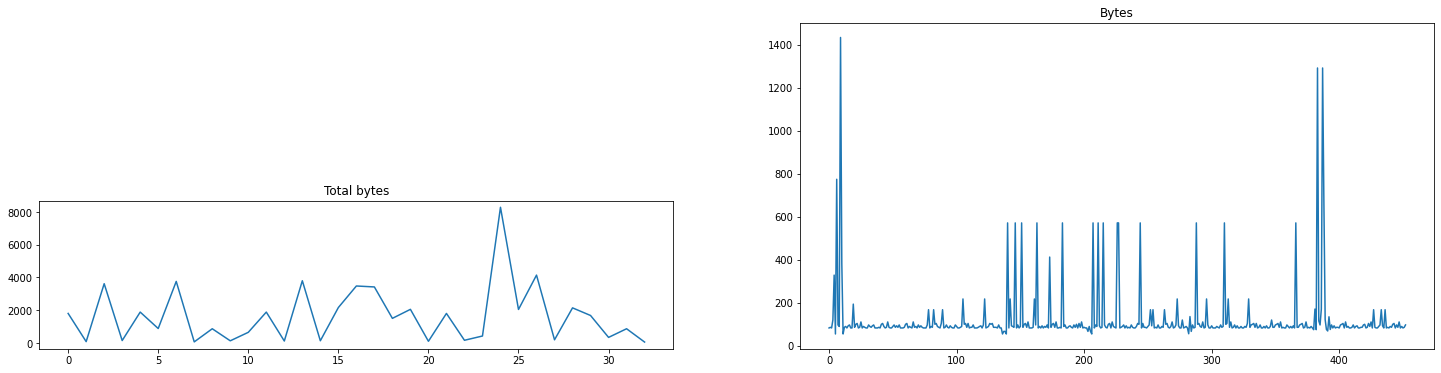

In [36]:
plt.figure(figsize=(25, 6))

pylab.subplot (2, 2, 3)
pylab.plot(df_3['Total bytes'], label="Total bytes")
pylab.title ("Total bytes")


pylab.subplot (1, 2, 2)
pylab.plot (df_pcapFile['Bytes'], label="Bytes")
pylab.title ("Bytes")

pylab.show()


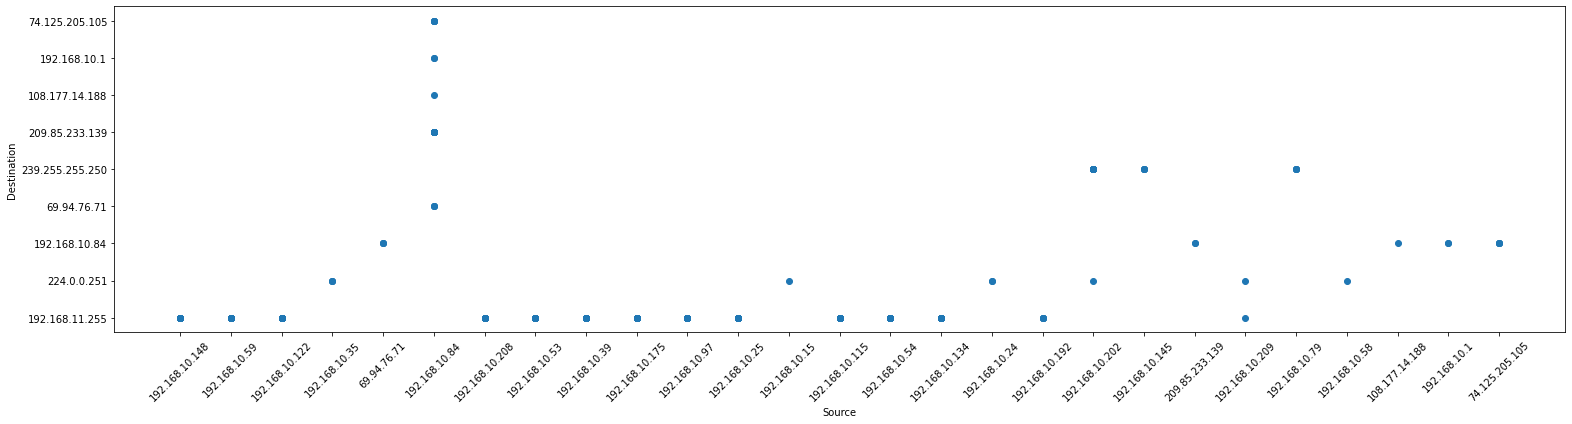

In [37]:
plt.figure(figsize=(26, 6))
plt.scatter(df_pcapFile['Source'], df_pcapFile['Destination'])
plt.xlabel("Source")
plt.ylabel("Destination")
plt.xticks(rotation=45)
plt.show()

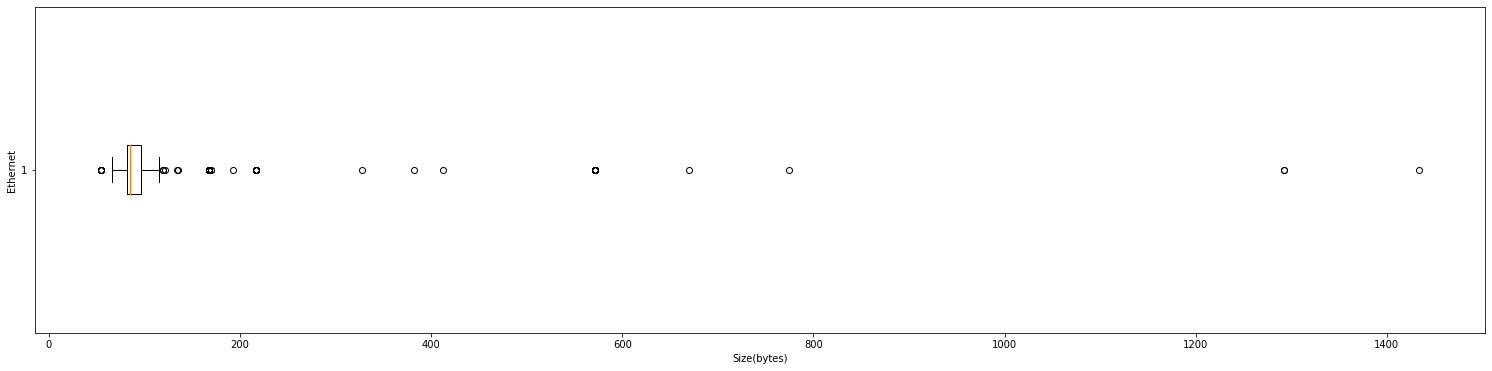

In [72]:
plt.figure(figsize=(26,6))
plt.boxplot(df_pcapFile['Bytes'], vert=False)
plt.xlabel("Size(bytes)")
plt.ylabel("Ethernet")
plt.show()

In [37]:
# spark.stop()
# exit()